In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu

#plt.style.use('seaborn-colorblind')
plt.style.use('ggplot')


# Mann Whitney Test

The two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are randomly mixed in the rank ordering or if they are clustered at opposite ends when combined. A random rank order would mean that the two samples are not different, while a cluster of one sample values would indicate a difference between them.

In [2]:
def describe(data):
    print("mean: " + str(np.mean(data)))
    print("ranksum: " + str(np.sum(data)))
    print("median:" + str(np.median(data)))
    print("std dev: " + str(np.std(data)))

In [3]:
def bp(x, y, title, total=True):
    if not total:
        x_total = np.sum(x, axis=1)
        y_total = np.sum(y, axis=1)
    else:
        x_total = x
        y_total = y
    plt.figure()
    plt.title(title)
    plot_data = [x_total, y_total]
    plt.boxplot(plot_data, notch=True)
    plt.ylabel('Sum of Scores')
    plt.xticks([1, 2], ['Control', 'Experimental'])

In [4]:
def mann_whitney(data1, data2):
    '''Performs a Mann-Whitney test. Returns '''
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
        return False, stat, p
    else:
        print('Different distribution (reject H0)')
        return True, stat, p

In [5]:
def effect_size_mw(x_total, y_total, stat):
    s, l = [y_total, x_total] if np.sum(y_total) < np.sum(x_total) else [x_total, y_total]
    N = len(x_total)+len(y_total)
    ns = len(s)
    nl = len(l)

#    mu = (ns * (N+1))/2
    mu = (ns * nl) / 2
    sigma = math.sqrt((ns * nl * (N+1))/12)
#    z = (np.sum(s) - mu)/sigma
    z = (stat - mu)/sigma
    r = z / math.sqrt(N)
    return r

In [6]:
def effect_size_t(t, df):
    return math.sqrt((t*t)/((t*t)+df))

In [7]:
def mw(x, y, total=False):
    if not total:
        x_total = np.sum(x, axis=1)
        y_total = np.sum(y, axis=1)
    else:
        x_total = x
        y_total = y

    stat, p = mannwhitneyu(x_total, y_total)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    r = effect_size_mw(x_total, y_total, stat)

    print(r)
    return stat, p, r


In [8]:
def histogram_data(title, data, log_data, labels):
    plt.figure()
    plt.title(title)
    plt.xlabel('Sum of Ranks')
    plt.ylabel('Number of Responses')
    plt.hist([data, log_data], label=labels)
    plt.legend(loc='upper right')
    plt.show()


In [9]:
def is_normal(data_x, data_y, titles):
    print('Control:')
    stat, values, sig = stats.anderson(data_x)
    print(f"\tTest Statistic: {stat}\n\tCritical values: {values}\n\tSignificance levels: {sig}")
    if stat > values[2]:
        print("not normally distributed")
    else: 
        print("normally distributed")

    print('Experimental:')
    stat, values, sig = stats.anderson(data_y)
    print(f"\tTest Statistic: {stat}\n\tCritical values: {values}\n\tSignificance levels: {sig}")

    if stat > values[2]:
        print("not normally distributed")
    else: 
        print("normally distributed")
    labels = ['Control', 'Experimental']
    
    histogram_data(titles, data_x, data_y, labels)

# Import and structure data for Analysis

In [10]:
import pandas as pd

xlsx = (r'data.xlsx')

df1 = pd.read_excel(xlsx, 'Control Condition')
df2 = pd.read_excel(xlsx, 'Experimental Condition')

In [11]:
control_data = pd.DataFrame(df1)
experimental_data = pd.DataFrame(df2)

## List of headers

In [12]:
list(control_data.columns.values)

['Timestamp',
 'Unnamed: 1',
 '#',
 'Do you agree that we can store your data anonymously and only for use in the context of this particular thesis?',
 'I found my mind wandering while the game was on',
 'At points, I had a hard time making sense of what was going on in the game',
 'My understanding of the characters is unclear',
 'While the game was on I found myself thinking about other things',
 'I had a hard time recognising the thread of the story',
 'The game created a new world, and then that world suddenly disappeared when the game ended',
 'At times during the game, the story world was closer to me than the real world',
 'I had a hard time keeping my mind on the game',
 'During the game, my body was in the room, but my mind was inside the world created by the story',
 'I would like to play this game again',
 'Unnamed: 14',
 'I did not experience any narrative progression',
 'At the end, I knew more about the narrative than when I began',
 'I was more interested in the narrativ

# Test Plan
## Engagement
- Narrative Understanding - 3 items - t-Test
- Attentional focus - 3 items - t-Test
- Narrative Presence - 3 items - t-Test
- I would lke to play this game again - 1 item - Mann Whitney U

## Tension
6 items - t-Test

## Narrative Coherency
binary coding, only concerned with frequency (i.e. understood or didn't understand)
Chi Square

## PCG Environment
Mann Whitney on Each item

__reference for using t-test on Likert Items:__
https://www.researchgate.net/post/Is_it_appropriate_to_use_Mann_Whitney_U_test_to_compare_between_two_unrelated_groups_unequal_no_of_participants_where_response_is_in_likert_scale

## Narrative Engagement

In [13]:
narrative_understanding = [
    'At points, I had a hard time making sense of what was going on in the game',
    'My understanding of the characters is unclear',
    'I had a hard time recognising the thread of the story']
attentional_focus = [
    'I found my mind wandering while the game was on',
    'While the game was on I found myself thinking about other things',
    'I had a hard time keeping my mind on the game']
narrative_presence = [
    'During the game, my body was in the room, but my mind was inside the world created by the story',
    'The game created a new world, and then that world suddenly disappeared when the game ended',
    'At times during the game, the story world was closer to me than the real world'
]
play_again = ['I would like to play this game again']

In [14]:
x_understanding = np.sum(np.subtract(8, control_data[narrative_understanding].to_numpy()), axis=1)
y_understanding = np.sum(np.subtract(8, experimental_data[narrative_understanding].to_numpy()), axis=1)

x_attention = np.sum(np.subtract(8, control_data[attentional_focus].to_numpy()), axis=1)
y_attention = np.sum(np.subtract(8, experimental_data[attentional_focus].to_numpy()), axis=1)

x_presence = np.sum(control_data[narrative_presence].to_numpy(), axis=1)
y_presence = np.sum(experimental_data[narrative_presence].to_numpy(), axis=1)

### Andersen-Darling

Before determining if we can use a t-test, first we much see if the data is normally distributed using the Anderson-Darling test, using ```scipy.stats.anderson```
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html.

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm

## Understanding

Control:
	Test Statistic: 0.7499008913187168
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 0.5991297007023064
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed


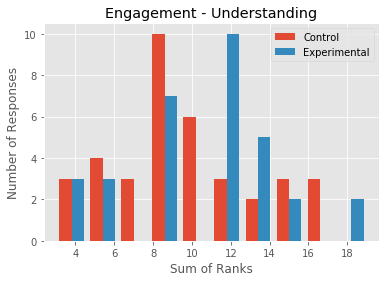

LeveneResult(statistic=0.06981704504132913, pvalue=0.7924144328697006)

In [15]:
is_normal(x_understanding, y_understanding, 'Engagement - Understanding')
stats.levene(x_understanding, y_understanding)

Control:
	Test Statistic: 0.5186924805792401
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 1.629999131400183
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


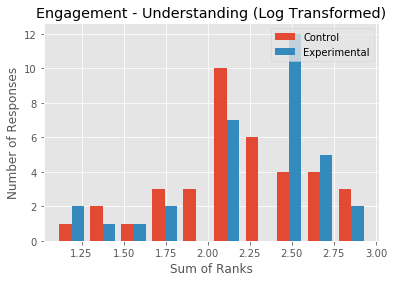

LeveneResult(statistic=0.012385700125302098, pvalue=0.9117182720070695)

In [16]:
is_normal(np.log(x_understanding), np.log(y_understanding), 'Engagement - Understanding (Log Transformed)')
stats.levene(np.log(x_understanding), np.log(y_understanding))

Statistics=467.000, p=0.066
Same distribution (fail to reject H0)
-0.18107196702852427


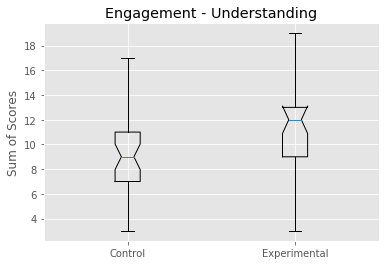

In [17]:
mw(x_understanding, y_understanding, total=True)
bp(x_understanding, y_understanding, 'Engagement - Understanding', total=True)

In [18]:
describe(x_understanding)
describe(y_understanding)

mean: 9.513513513513514
ranksum: 352
median:9.0
std dev: 3.5763609892589225
mean: 10.6875
ranksum: 342
median:12.0
std dev: 3.8765118018651767


## Attention

Control:
	Test Statistic: 0.28750510958478515
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 0.6766692878579974
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed


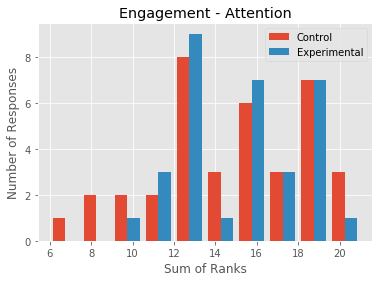

LeveneResult(statistic=2.047716524870811, pvalue=0.15708253740274963)


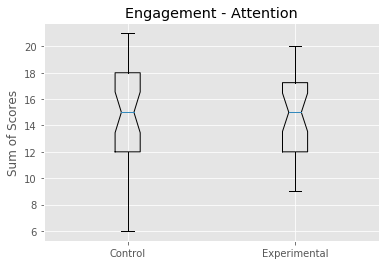

In [19]:
is_normal(x_attention, y_attention, 'Engagement - Attention')
print(stats.levene(x_attention, y_attention))
bp(x_attention, y_attention, 'Engagement - Attention', total=True)

In [20]:
t, p = stats.ttest_ind(x_attention, y_attention, equal_var=True)
r = effect_size_t(t, 67)
print(t, p, r)

-0.22981779158046306 0.818933547687679 0.02806565197848706


In [21]:
describe(x_attention)
describe(y_attention)

mean: 14.594594594594595
ranksum: 540
median:15.0
std dev: 3.6941111607636947
mean: 14.78125
ranksum: 473
median:15.0
std dev: 2.814409074299612


## Presence

Control:
	Test Statistic: 0.5543974332656276
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 0.506584636662744
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed


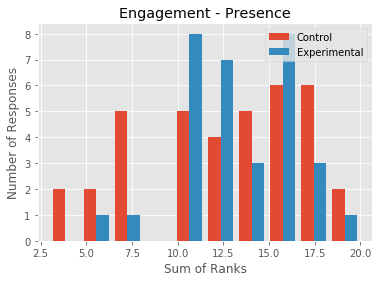

LeveneResult(statistic=3.590827746715255, pvalue=0.06241516314129446)


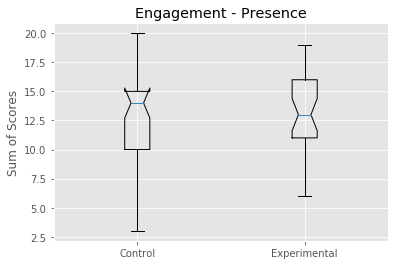

In [22]:
is_normal(x_presence, y_presence, 'Engagement - Presence')
print(stats.levene(x_presence, y_presence))
bp(x_presence, y_presence, 'Engagement - Presence', total=True)

In [76]:
t, p = stats.ttest_ind(x_presence, y_presence, equal_var=False)
r = effect_size_t(t, 67)
print(t, p, r)

-0.9809236222300768 0.330203620401312 0.11898752828582528


In [77]:
describe(x_presence)
describe(y_presence)

mean: 24.10810810810811
ranksum: 892
median:25.0
std dev: 5.774050916671296
mean: 25.46875
ranksum: 815
median:25.0
std dev: 5.562061078188552


## Total Narrative Engagement

In [78]:
total_x = np.add(x_understanding, x_attention, x_presence)

In [79]:
total_y = np.add(y_understanding, y_attention, y_presence)

In [80]:
describe(total_x)
describe(total_y)

mean: 24.10810810810811
ranksum: 892
median:25.0
std dev: 5.774050916671296
mean: 25.46875
ranksum: 815
median:25.0
std dev: 5.562061078188552


Control:
	Test Statistic: 0.5159021814162941
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 0.28681783780618275
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed


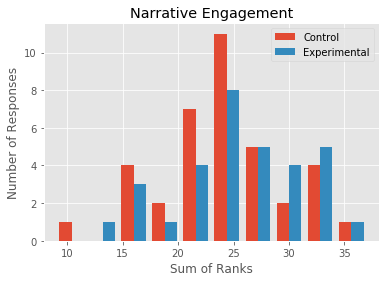

In [81]:
is_normal(total_x, total_y, 'Narrative Engagement')

In [82]:
stats.levene(total_x, total_y)

LeveneResult(statistic=0.014283878797820311, pvalue=0.9052248575906978)

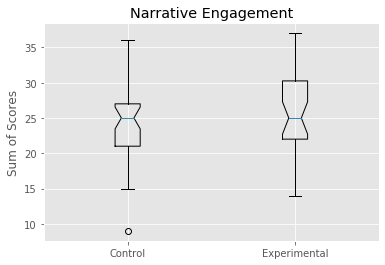

In [83]:
bp(total_x, total_y, 'Narrative Engagement', total=True)

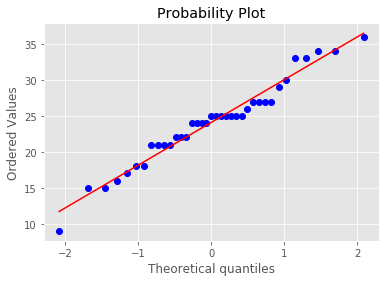

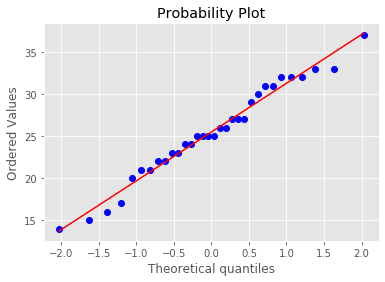

In [84]:
# This is not a qq plot
plt.figure
plt.title("Control") 
stats.probplot(total_x, dist="norm", plot=plt)
plt.show() 

plt.title("Experimental")
stats.probplot(total_y, dist="norm", plot=plt)
plt.show() 

Anderson-Darling shows that the data for the cumulative Engagement Measure is normally distrbuted.

The data still needs analysis with Levene's test before declaring it parametric

Levene's test is __not__ significant, meaning we can accept the null hypothesis that the variance in the different samples is apprximately equal.

As such, we can treat this data as parametric, and perform a t-test

In [85]:
t, p = stats.ttest_ind(total_x, total_y, equal_var=False)
r = effect_size_t(t, 67)
print(t, p, r)

-0.9809236222300768 0.330203620401312 0.11898752828582528


## Summary of Engagement

There is no significant difference in Engagment across conditions (p = 0.33, a = 0.05)

# I Want to Play Again

In [33]:
x = control_data[play_again]
y = experimental_data[play_again]

In [34]:
x = x.to_numpy()
y = y.to_numpy()

describe(x)
describe(y)

mean: 3.6486486486486487
ranksum: 135
median:3.0
std dev: 1.8631013988771987
mean: 4.21875
ranksum: 135
median:4.0
std dev: 1.6906798743404974


Statistics=488.500, p=0.105
Same distribution (fail to reject H0)
-0.1499275886996181


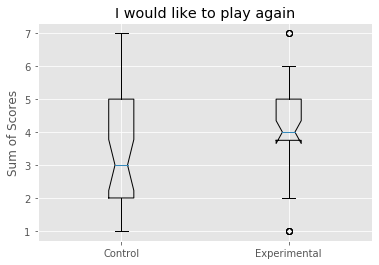

In [35]:
mw(x, y, total=True)
bp(x, y, 'I would like to play again', total=True)

# Narrative Tension

In [36]:
narrative_tension = [
    'At the end, I knew more about the narrative than when I began', 
    'I was more interested in the narrative at the beginning than the end',
    'My attention towards the narrative increased over time']
narrative_tension_rc = [
    'I did not experience any narrative progression',
    'I became less and less interested in the narrative as it progressed',
    'At no point did I find the narrative interesting']

x_positive = control_data[narrative_understanding].to_numpy()
x_reverse = np.subtract(8, control_data[narrative_tension_rc].to_numpy())

x = np.concatenate((x_positive, x_reverse), axis=1)

y_positive = experimental_data[narrative_understanding].to_numpy()
y_reverse = np.subtract(8, experimental_data[narrative_tension_rc].to_numpy())

y = np.concatenate((y_positive, y_reverse), axis=1)



In [37]:
total_x = np.sum(x, axis=1)
total_y = np.sum(y, axis=1)

## Anderson-Darling & Levene's Tests

Control:
	Test Statistic: 0.256634358504904
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 0.8163999201752148
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


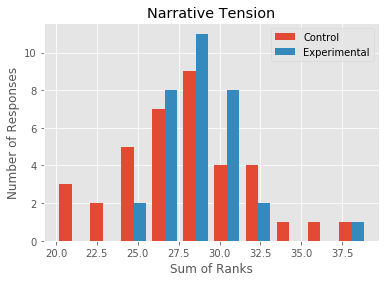

LeveneResult(statistic=4.616511586039338, pvalue=0.035283407753976856)

In [38]:
is_normal(total_x, total_y, 'Narrative Tension')
stats.levene(total_x, total_y)

## Anderson-Darling & Levene's Tests (Log Transformed Data)

Control:
	Test Statistic: 0.2824113868290823
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed
Experimental:
	Test Statistic: 0.5907148712229429
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
normally distributed


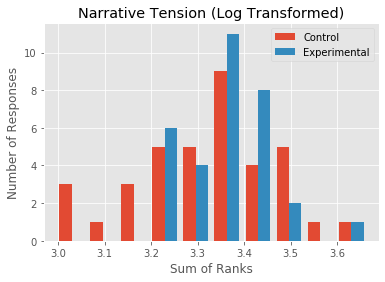

LeveneResult(statistic=5.740185150615078, pvalue=0.019380783899352546)

In [39]:
is_normal(np.log(total_x), np.log(total_y), 'Narrative Tension (Log Transformed)')
stats.levene(np.log(total_x), np.log(total_y))

Log transformed data is normally distributed in both conditions, but levene's suggests inequality of variance, so it cannot be treated as parametric

In [40]:
mw(x, y)

Statistics=498.500, p=0.130
Same distribution (fail to reject H0)
-0.13544183133733617


(498.5, 0.13021900761610822, -0.13544183133733617)

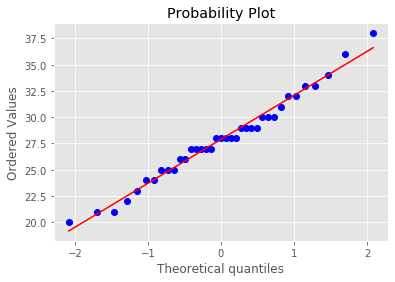

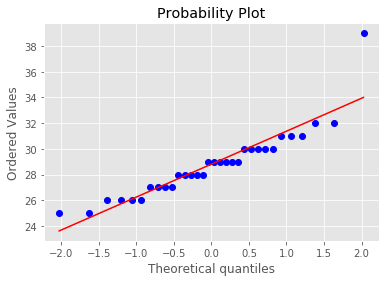

In [41]:
# This is not a qq plot
plt.figure
plt.title("Control") 
stats.probplot(total_x, dist="norm", plot=plt)
plt.show() 

plt.title("Experimental")
stats.probplot(total_y, dist="norm", plot=plt)
plt.show() 

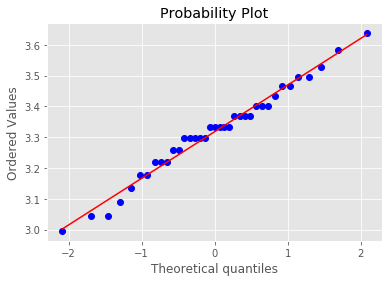

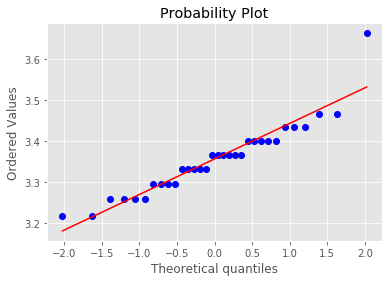

In [42]:
# This is not a qq plot
plt.figure
plt.title("Control") 
stats.probplot(np.log(total_x), dist="norm", plot=plt)
plt.show() 

plt.title("Experimental")
stats.probplot(np.log(total_y), dist="norm", plot=plt)
plt.show() 

Statistics=498.500, p=0.130
Same distribution (fail to reject H0)
-0.13544183133733617


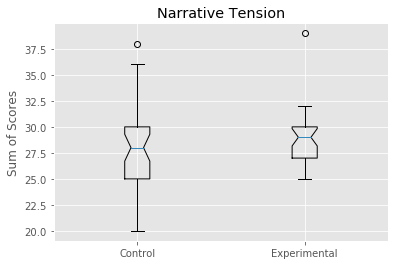

In [43]:
mw(total_x, total_y, total=True)
bp(total_x, total_y, 'Narrative Tension', total=True)

In [44]:
describe(total_x)
describe(total_y)

mean: 27.89189189189189
ranksum: 1032
median:28.0
std dev: 4.032193312234863
mean: 28.8125
ranksum: 922
median:29.0
std dev: 2.6390990413396764


#  Narrative Coherency

In [45]:
_1_f = ['Binary Code','Binary Code.6']
_1_mc_orig = ['Original Code', 'Original Code.3']
_1_mc = ['Binary Code.1','Binary Code.7']

_2_f = ['Binary Code.8','Binary Code.10']
_2_mc = ['Binary Code.9', 'Binary Code.11']
_2_mc_orig = ['Original Code.4', 'Original Code.5']

_3_f = ['Binary Code.2','Binary Code.14']
_3_mc = ['Binary Code.3', 'Binary Code.15']
_3_mc_orig = ['Original Code.1', 'Original Code.7']

_0_f = ['Binary Code.4','Binary Code.12']
_0_mc = ['Binary Code.5', 'Binary Code.13']
_0_mc_orig = ['Original Code.2', 'Original Code.6']


In [46]:
x_1 = (np.sum(control_data[_1_mc_orig].to_numpy(), axis=1))
x_2 = (np.sum(control_data[_2_mc_orig].to_numpy(), axis=1))
x_3 = (np.sum(control_data[_3_mc_orig].to_numpy(), axis=1))
x_0 = (np.sum(control_data[_0_mc_orig].to_numpy(), axis=1))

q = np.concatenate((_1_mc_orig, _2_mc_orig, _3_mc_orig, _0_mc_orig))
x_total = (np.sum(control_data[q].to_numpy(), axis=1))

([<matplotlib.axis.XTick at 0x1d1e88c8>,
 <a list of 4 Text xticklabel objects>)

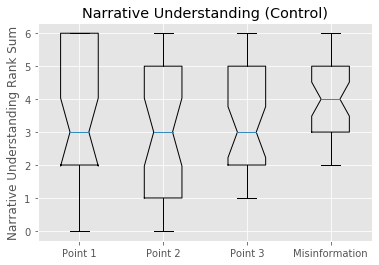

In [47]:
plt.figure()
plt.title('Narrative Coherency (Control)')
plot_data = [x_1, x_2, x_3, x_0]
plt.boxplot(plot_data, notch=True)
plt.ylabel('Narrative Understanding Rank Sum')
plt.xticks([1, 2, 3, 4], ['Point 1', 'Point 2', 'Point 3', 'Misinformation'])

In [48]:
y_1 = (np.sum(experimental_data[_1_mc_orig].to_numpy(), axis=1))
y_2 = (np.sum(experimental_data[_2_mc_orig].to_numpy(), axis=1))
y_3 = (np.sum(experimental_data[_3_mc_orig].to_numpy(), axis=1))
y_0 = (np.sum(experimental_data[_0_mc_orig].to_numpy(), axis=1))

q = np.concatenate((_1_mc_orig, _2_mc_orig, _3_mc_orig, _0_mc_orig))
y_total = (np.sum(experimental_data[q].to_numpy(), axis=1))

([<matplotlib.axis.XTick at 0x1c052070>,
 <a list of 4 Text xticklabel objects>)

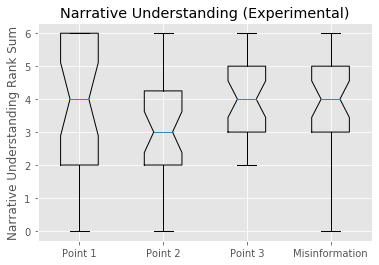

In [49]:
plt.figure()
plt.title('Narrative Coherency Leve (Experimental)')
plot_data = [y_1, y_2, y_3, y_0]
plt.boxplot(plot_data, notch=True)
plt.ylabel('Narrative Understanding Rank Sum')
plt.xticks([1, 2, 3, 4], ['Point 1', 'Point 2', 'Point 3', 'Misinformation'])

## Total Coherency

Control:
	Test Statistic: 0.8269426111604119
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 0.7863925261613218
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


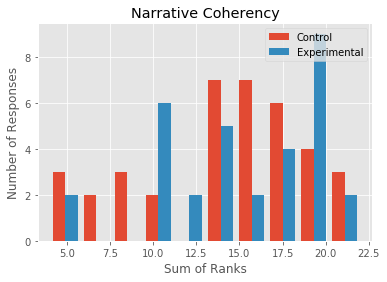

LeveneResult(statistic=0.007326409657824533, pvalue=0.9320440817288338)

In [50]:
is_normal(x_total, y_total, 'Narrative Coherency')
stats.levene(x_total, y_total)

Control:
	Test Statistic: 2.0567030172114187
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 1.3226799731159105
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


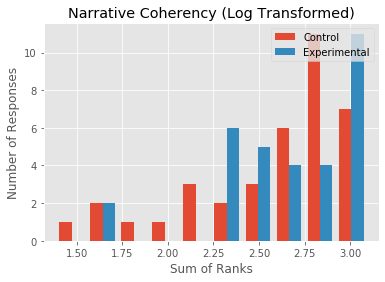

LeveneResult(statistic=0.29224301037249395, pvalue=0.59057942671122)

In [51]:
is_normal(np.log(x_total), np.log(y_total), 'Narrative Coherency (Log Transformed)')
stats.levene(np.log(x_total), np.log(y_total))

Statistics=533.500, p=0.242
Same distribution (fail to reject H0)
-0.08474168056934936


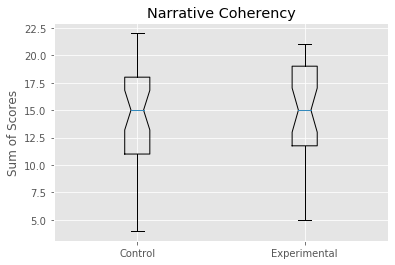

In [52]:
mw(x_total, y_total, total=True)
bp(x_total, y_total, 'Narrative Coherency', total=True)

In [53]:
describe(x_total)

mean: 14.135135135135135
ranksum: 523
median:15.0
std dev: 4.816425511877893


In [54]:
describe(y_total)

mean: 15.03125
ranksum: 481
median:15.0
std dev: 4.398042000424734


# PCG

In [55]:
usability = [
    'I was not able to navigate between two points in the environment', 
    'It was easy to get to the places I wanted to go'
]
suitability=[
    'The narrative did not feel well suited to this environment',
    'The atmosphere of the environment suited the narrative'
]
navigability=[
    'When I moved around in the environment I felt lost',
    'I always knew where to go in the environment'
]
interest=[
    'I was curious to explore the environment',
    'I found the environment boring', 
    'I want to continue exploring this environment'
]

In [56]:
## usability
x = control_data[usability]
y = experimental_data[usability]

temp = x.to_numpy()
fix = np.subtract([8, 0], temp)
x_usability = np.sum(np.multiply([1, -1], fix), axis=1)

temp = y.to_numpy()
fix = np.subtract([8, 0], temp)
y_usability = np.sum(np.multiply([1, -1], fix), axis=1)

In [57]:
## suitability
x = control_data[suitability]
y = experimental_data[suitability]

temp = x.to_numpy()
fix = np.subtract([8, 0], temp)
x_suitability = np.sum(np.multiply([1, -1], fix), axis=1)

temp = y.to_numpy()
fix = np.subtract([8, 0], temp)
y_suitability = np.sum(np.multiply([1, -1], fix), axis=1)

In [58]:
## navigability
x = control_data[navigability]
y = experimental_data[navigability]

temp = x.to_numpy()
fix = np.subtract([8, 0], temp)
x_navigability = np.sum(np.multiply([1, -1], fix), axis=1)

temp = y.to_numpy()
fix = np.subtract([8, 0], temp)
y_navigability = np.sum(np.multiply([1, -1], fix), axis=1)

In [59]:
## interest
x = control_data[interest]
y = experimental_data[interest]

temp = x.to_numpy()
fix = np.subtract([0, 8, 0], temp)
x_interest = np.sum(np.multiply([-1, 1, -1], fix), axis=1)

temp = y.to_numpy()
fix = np.subtract([0, 8, 0], temp)
y_interest = np.sum(np.multiply([-1, 1, -1], fix), axis=1)

## Usability

Control:
	Test Statistic: 0.8359015222913513
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 0.8423639077556544
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


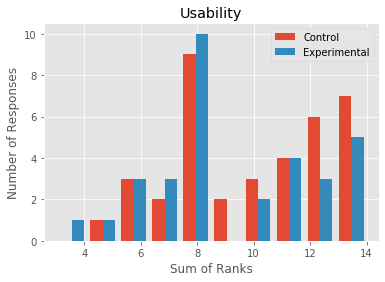

LeveneResult(statistic=0.0025771543600066425, pvalue=0.9596632831990837)

In [60]:
is_normal(x_usability, y_usability, 'Usability')
stats.levene(x_usability, y_usability)

Control:
	Test Statistic: 0.895266981735638
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 0.8315904824099221
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


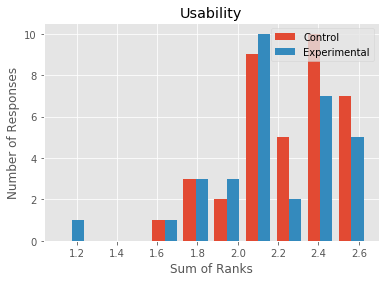

LeveneResult(statistic=0.0025771543600066425, pvalue=0.9596632831990837)

In [61]:
is_normal(np.log(x_usability), np.log(y_usability), 'Usability')
stats.levene(x_usability, y_usability)

Statistics=498.500, p=0.128
Same distribution (fail to reject H0)
-0.13544183133733617


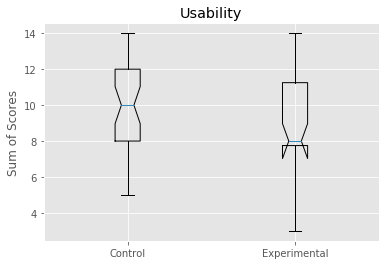

In [62]:
mw(x_usability, y_usability, total=True)
bp(x_usability, y_usability, 'Usability', total=True)

In [63]:
describe(x_usability)
describe(y_usability)

mean: 9.945945945945946
ranksum: 368
median:10.0
std dev: 2.588393490554136
mean: 9.1875
ranksum: 294
median:8.0
std dev: 2.7549671050667737


## Suitability

In [64]:
x = x_usability
y = y_suitability
label= 'Suitability'

Control:
	Test Statistic: 0.8359015222913513
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 1.2074640108268966
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


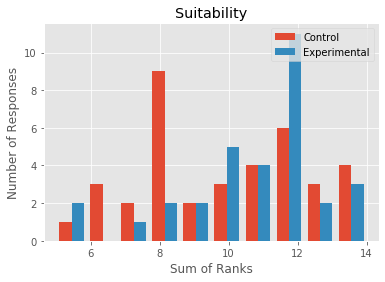

LeveneResult(statistic=2.4494886789160795, pvalue=0.1222744650112825)

In [65]:
is_normal(x, y, label)
stats.levene(x, y)

Control:
	Test Statistic: 0.895266981735638
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 2.014543374028463
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


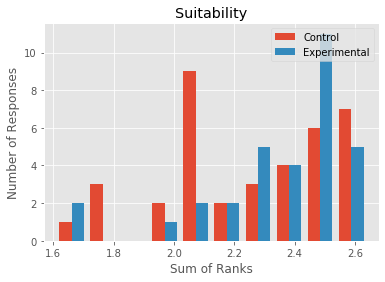

LeveneResult(statistic=2.1631284167145344, pvalue=0.14603771492620213)

In [66]:
is_normal(np.log(x), np.log(y), label)
stats.levene(np.log(x), np.log(y))

Statistics=479.500, p=0.086
Same distribution (fail to reject H0)
-0.16296477032567186
mean: 9.945945945945946
ranksum: 368
median:10.0
std dev: 2.588393490554136
mean: 10.78125
ranksum: 345
median:11.5
std dev: 2.2601766385616857


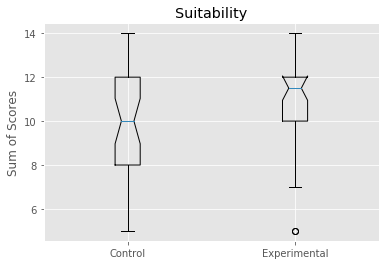

In [67]:
mw(x, y, total=True)
bp(x, y, label, total=True)
describe(x)
describe(y)

## Navigability

In [68]:
x = x_navigability
y = y_navigability
label= 'Navigability'

Control:
	Test Statistic: 1.0113344550000392
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 0.781073565784169
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


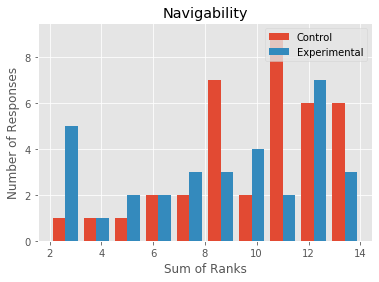

LeveneResult(statistic=4.825938541913779, pvalue=0.03149805488744755)

In [69]:
is_normal(x, y, label)
stats.levene(x, y)

Control:
	Test Statistic: 2.077964384910395
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 1.578298206645755
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


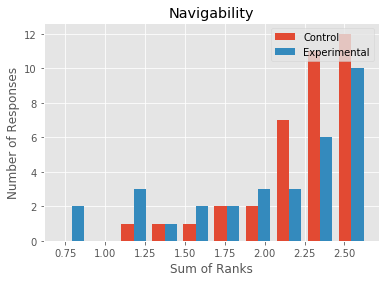

LeveneResult(statistic=5.4914495050599434, pvalue=0.022085833547788997)

In [70]:
is_normal(np.log(x), np.log(y), label)
stats.levene(np.log(x), np.log(y))

Statistics=470.000, p=0.070
Same distribution (fail to reject H0)
-0.1767262398198397
mean: 10.0
ranksum: 370
median:11.0
std dev: 2.7212874536522973
mean: 8.5625
ranksum: 274
median:9.5
std dev: 3.6991341892394227


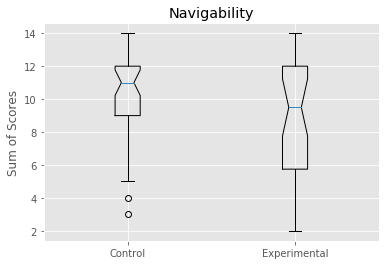

In [71]:
mw(x, y, total=True)
bp(x, y, label, total=True)
describe(x)
describe(y)

In [72]:
describe(x)
describe(y)

mean: 10.0
ranksum: 370
median:11.0
std dev: 2.7212874536522973
mean: 8.5625
ranksum: 274
median:9.5
std dev: 3.6991341892394227


## Interest

In [73]:
x = x_interest
y = y_interest
label= 'Interest'

Control:
	Test Statistic: 0.8574887821860173
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 1.0949867997994076
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


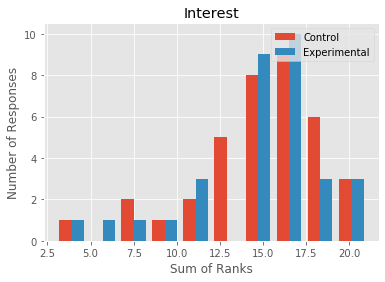

LeveneResult(statistic=0.010215108522587444, pvalue=0.9197968851969623)

In [74]:
is_normal(x, y, label)
stats.levene(x, y)

Control:
	Test Statistic: 2.616850419436325
	Critical values: [0.529 0.602 0.722 0.842 1.002]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed
Experimental:
	Test Statistic: 2.559516914179113
	Critical values: [0.523 0.596 0.715 0.834 0.992]
	Significance levels: [15.  10.   5.   2.5  1. ]
not normally distributed


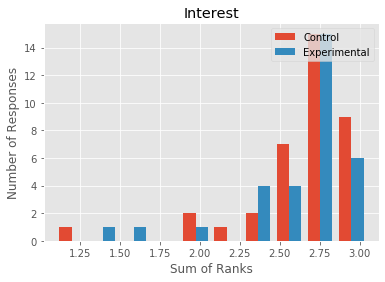

LeveneResult(statistic=0.015362770945471326, pvalue=0.9017286196987556)

In [86]:
is_normal(np.log(x), np.log(y), label)
stats.levene(np.log(x), np.log(y))

Statistics=584.500, p=0.466
Same distribution (fail to reject H0)
-0.010864318021711455
mean: 14.91891891891892
ranksum: 552
median:15.0
std dev: 3.8581495240830948
mean: 14.78125
ranksum: 473
median:15.5
std dev: 4.059975176956135


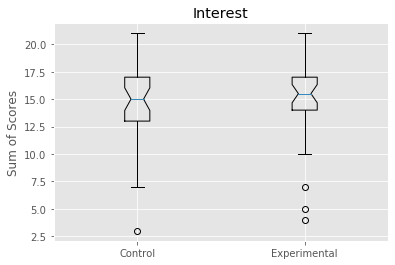

In [75]:
mw(x, y, total=True)
bp(x, y, label, total=True)
describe(x)
describe(y)